In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dosya_yolu="/content/linear-regression-dataset.csv"
data=pd.read_csv(dosya_yolu)

In [ ]:
data

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


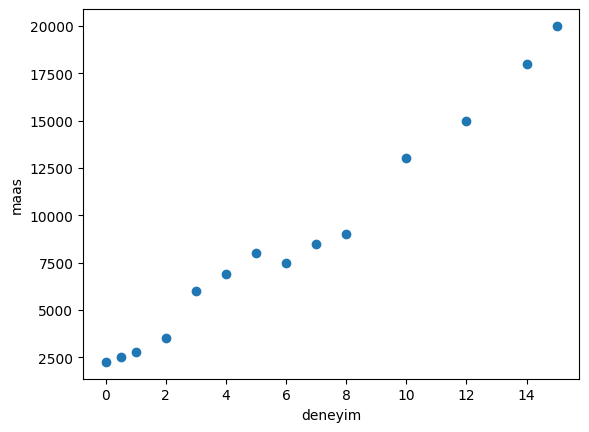

In [ ]:
deneyim=data["deneyim"]
maas=data['maas']

plt.scatter(deneyim,maas)
plt.xlabel('deneyim')
plt.ylabel('maas')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
# lineer regresyon modeli olustur
lr=LinearRegression()
#x bağımsısz değişken (deneyım), y bağımlı değşken(maas)
#reshape(-1,1) tekmkolonlu matrıs halıne getir
X=data.deneyim.values.reshape(-1,1)
Y=data.maas.values.reshape(-1,1)
#model eğtim verisi ile fit ediyoruz(uydururyoruz)
lr.fit(X,Y)
#modelin R^2 skorunu hesaplıyoz(bapımsız değişkenn bağımlıya açıklama oranı)
skor=lr.score(X,Y)
print(skor)
# modelin katsayılarını alıyoruz
b0=lr.intercept_ #sabıt terım
b1=lr.coef_#x ın katsayısı

print(b0)
print(b1)

print("Regresyon denklemi Y=" +str(b0) + "+" + str(b1) + "X")

0.9775283164949903
[1663.89519747]
[[1138.34819698]]
Regresyon denklemi Y=[1663.89519747]+[[1138.34819698]]X


In [ ]:
deneyim9=1663.89519747+1138.34819698*9 #9 deneyım yılı 1663 x 0 olddugun da y nın degerı 1138 x ın katsayısı
deneyim9

11909.028970289999

In [ ]:
deneyim9=lr.predict([[9]]) #9 yıllık deneyım sahıbı kısnın maasını lıneer regresyon ile bul
deneyim9

array([[11909.02897025]])

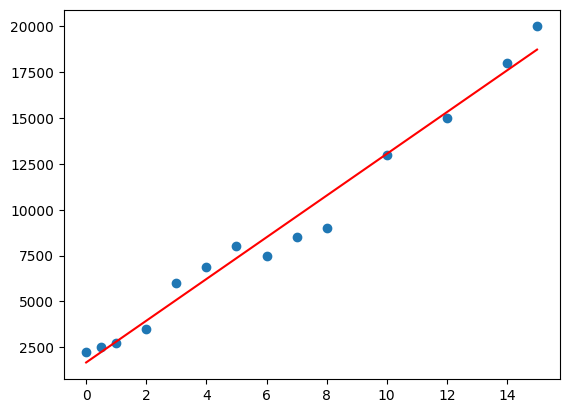

In [ ]:
# 0 15 kadar  deneyım değerlerini olusturuyoz ve 2 boyutlu hael getırıyoz
array=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)
# mevcut veri setınde kı x ve y degerlerini scatter plot ıle çiz
plt.scatter(X,Y)# her verisi noktasını noktalar olarak goster
#yenı X değeri için model tahmın ettıgı Y degerlerini hesaplıyoz
tahminEdilen=lr.predict(array)
#tahmmın edılenlerı kırmızı ile cız
plt.plot(array,tahminEdilen,color="red")
plt.show()

In [ ]:
lr.predict([[20]]) # 20 yıllık deneyımlı sahıp kısının maasını tahmın etme lıneer regresyon modelını kullnarak

array([[24430.85913699]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dosya_yolu="/content/linear-regression-dataset.csv"
data=pd.read_csv(dosya_yolu)

lr= LinearRegression()

X=data.deneyim.values.reshape(-1,1)
Y=data.maas.values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
#r^2 skoru bağımsız değişkenlerin bağımlıya açıklama oranı
r2=r2_score(Y_test,Y_pred)
print("r2 değeri: ",r2)
#ortalama kare hatası
mse=mean_squared_error(Y_test,Y_pred)
print("mse değeri: ",mse)
#mse nın karekoku hata bırmı orj değerle aynı
rmse=np.sqrt(mse)
print("rmse değeri: ",rmse)
# ortalama mutlak hata
mae=mean_absolute_error(Y_test,Y_pred)
print("mae değeri: ",mae)
#ortalama yuzde hatası
mape=mean_absolute_percentage_error(Y_test,Y_pred)
print("mape değeri: ",mape)


r2 değeri:  0.9455565414771729
mse değeri:  1972063.0531601794
rmse değeri:  1404.3016247089438
mae değeri:  1363.6851222599787
mape değeri:  0.13733128641333722


{'Lineer Regresyon': {'r2': 0.9455565414771729, 'mse': 1972063.0531601794, 'rmse': np.float64(1404.3016247089438), 'mae': 1363.6851222599787, 'mape': 0.13733128641333722}, 'Ridge': {'r2': 0.9448267966321674, 'mse': 1998496.0331014923, 'rmse': np.float64(1413.6817297756565), 'mae': 1370.862354892206, 'mape': 0.1369584484982495}, 'Lasso': {'r2': 0.9455495308156637, 'mse': 1972316.9948992927, 'rmse': np.float64(1404.392037466495), 'mae': 1363.7562129389023, 'mape': 0.13732759344393353}, 'SVR': {'r2': -0.47884753063734364, 'mse': 53567143.887530446, 'rmse': np.float64(7318.957841628167), 'mae': 5164.57166917748, 'mape': 0.34695565443960286}, 'DecisionTreeRegressor': {'r2': 0.9033742331288344, 'mse': 3500000.0, 'rmse': np.float64(1870.8286933869706), 'mae': 1666.6666666666667, 'mape': 0.19074074074074077}}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


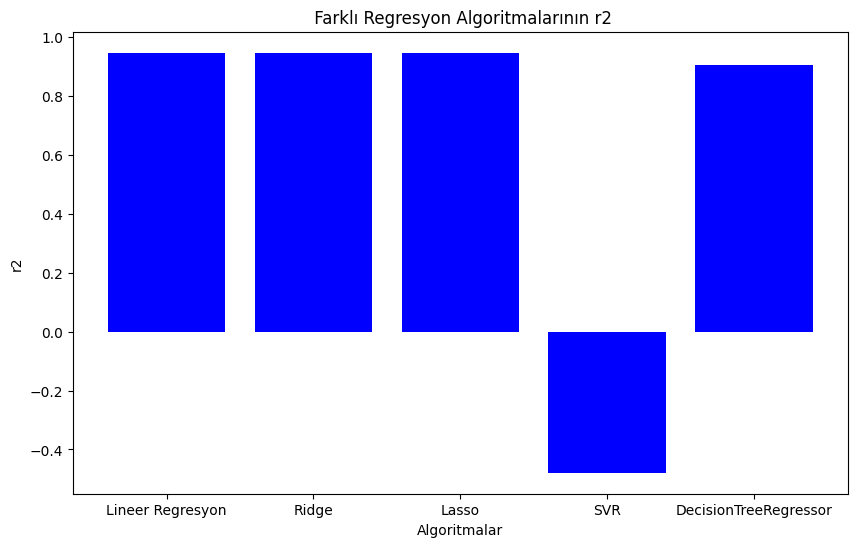

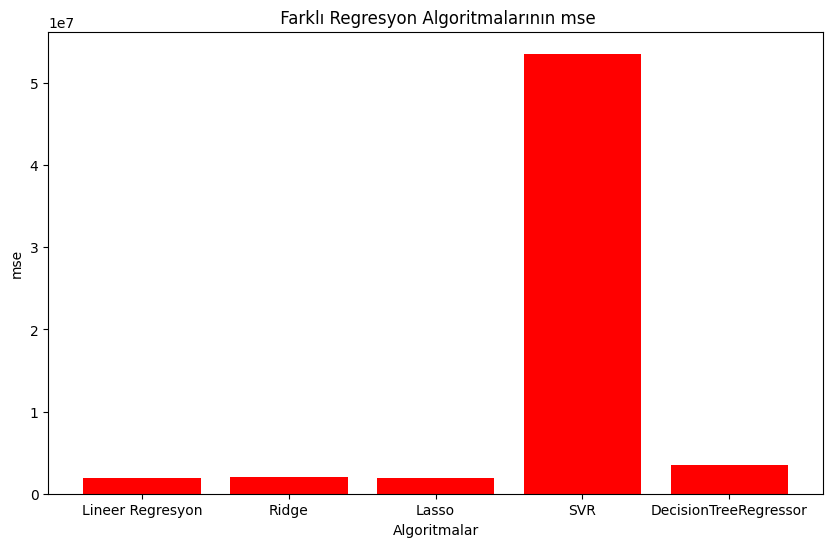

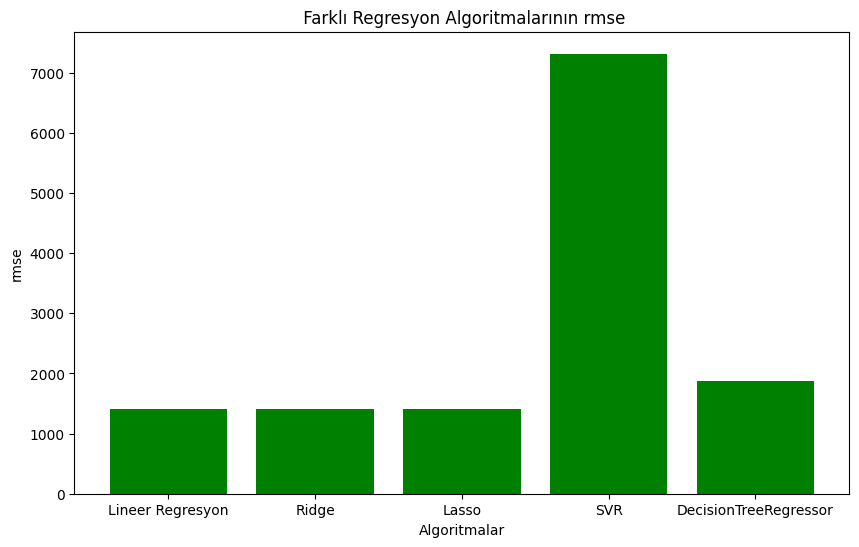

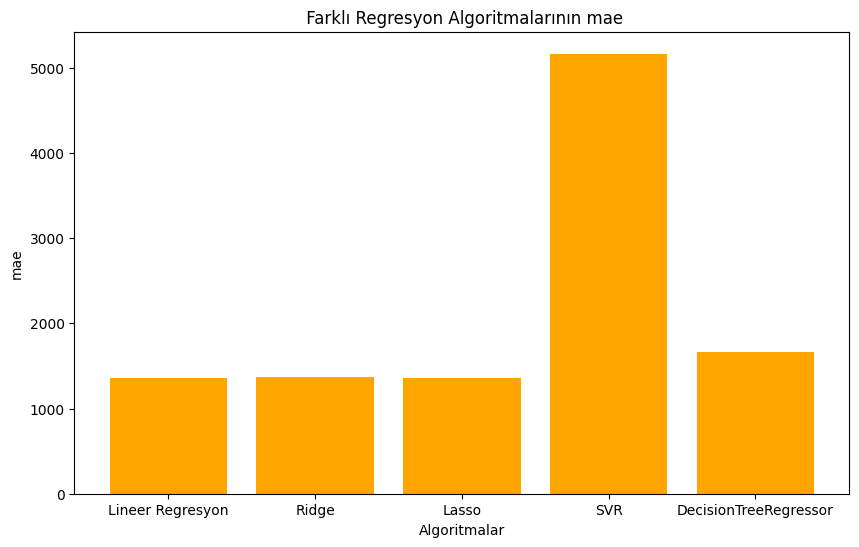

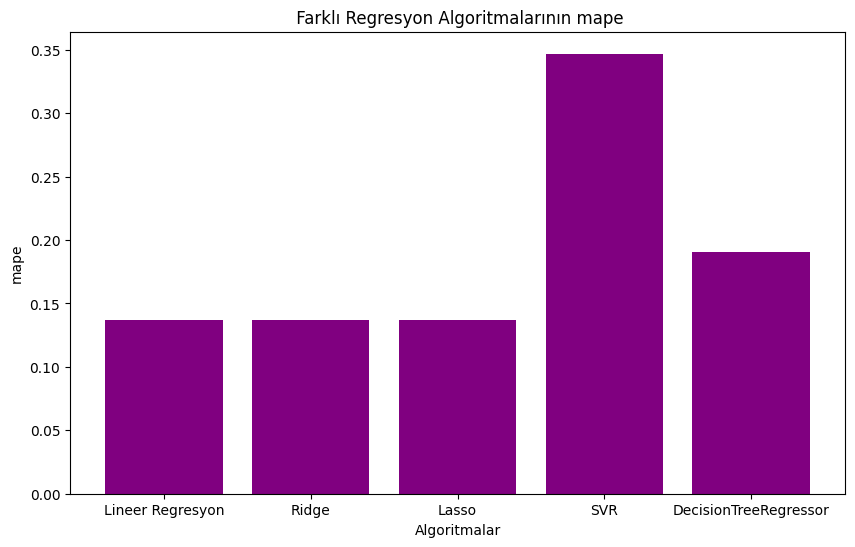

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

dosya_yolu="/content/linear-regression-dataset.csv"
data=pd.read_csv(dosya_yolu)

X=data.deneyim.values.reshape(-1,1)
Y=data.maas.values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# kullanılcak modelleri dictionary ile tanımlıyoz
models={
    "Lineer Regresyon":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "SVR":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor()
}

performance_metrics={} # model performans metrıklerını saklamak ıcın dictionary
#her bır model için
for name,model in models.items():
  model.fit(X_train,Y_train) # model eğtim veri ile fit et
  Y_pred=model.predict(X_test)#test verisi ile tahmın yap
  # performans metrıkelrını hesapla
  r2=r2_score(Y_test,Y_pred)# acıklanan varyans
  mse=mean_squared_error(Y_test,Y_pred)#ortalma kare hatası
  rmse=np.sqrt(mse)#karekoklu mse
  mae=mean_absolute_error(Y_test,Y_pred) # ortalama mutlak hatası
  mape=mean_absolute_percentage_error(Y_test,Y_pred)# ortalama yuzde hatası
# her modelin performansını dictonry eklee
  performance_metrics[name]={
      "r2":r2,
      "mse":mse,
      "rmse":rmse,
      "mae":mae,
      "mape":mape
  }
# Tum modellerın performanısnı yazdır
print(performance_metrics)
# perfofrmans metrıklerını ayrı listelere yazdır
r2degerleri=[metrik["r2"] for metrik in performance_metrics.values()]
msedegerleri=[metrik["mse"] for metrik in performance_metrics.values()]
rmsedegerleri=[metrik["rmse"] for metrik in performance_metrics.values()]
maedegerleri=[metrik["mae"] for metrik in performance_metrics.values()]
mapedegerleri=[metrik["mape"] for metrik in performance_metrics.values()]
algoritmalar=list(performance_metrics.keys())
#performans metrıkelrını bar pplot ile gorselleştir
def plot_metrik(metrik_adi,metrik_degerleri,renk):
  plt.figure(figsize=(10,6))
  plt.bar(algoritmalar,metrik_degerleri,color=renk)
  plt.xlabel("Algoritmalar")
  plt.ylabel(metrik_adi)
  plt.title(f" Farklı Regresyon Algoritmalarının {metrik_adi}")
  plt.show()
#her bır mertlıgı gorselleştir
plot_metrik("r2",r2degerleri,"blue")
plot_metrik("mse",msedegerleri,"red")
plot_metrik("rmse",rmsedegerleri,"green")
plot_metrik("mae",maedegerleri,"orange")
plot_metrik("mape",mapedegerleri,"purple")

In [ ]:
models={
    "Lineer Regresyon":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "SVR":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "LightGBMRegressor":LightGBMRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "Elastic Net":ElasticNet(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "MLPRegressor":MLPRegressor()
} # Hoca bunları çok kullanıyomuş.